In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from scipy.stats import boxcox

In [2]:
df = pd.read_csv('Train.csv')

In [6]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [7]:
df[num].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
df[cat].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [4]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Univariate Analysis

In [10]:
num

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

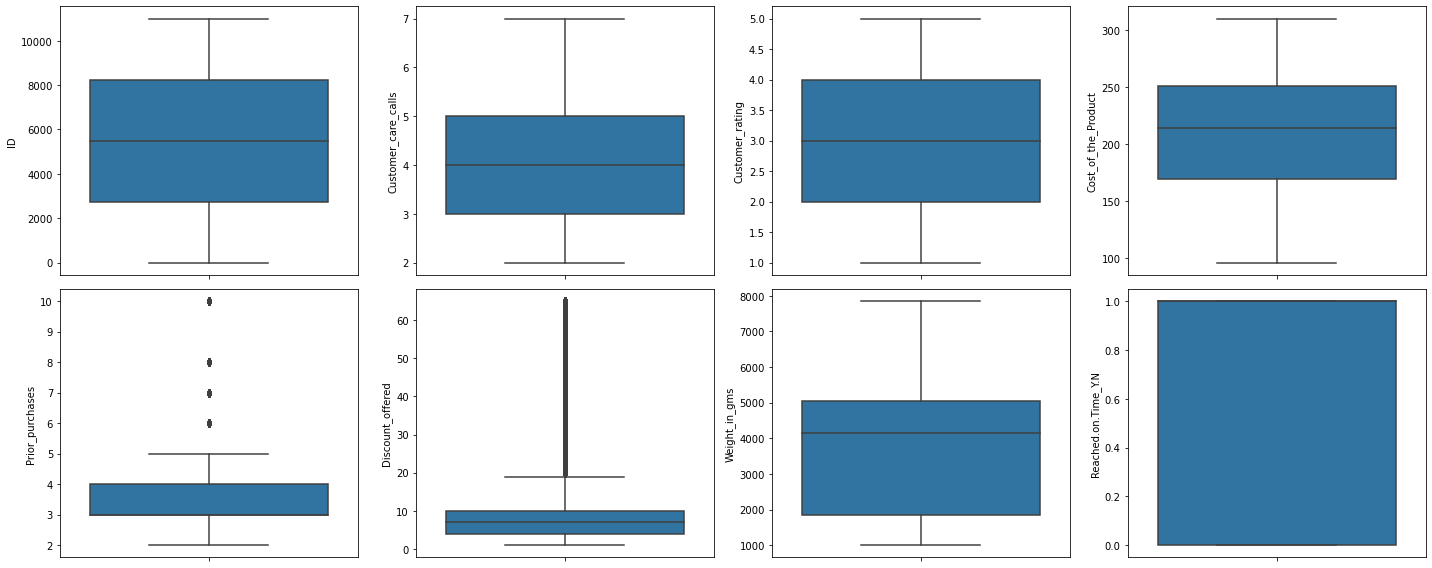

In [29]:
plt.figure(figsize = (20,8))
for i in range(len(num)):
    plt.subplot(2, round(len(num)/2), i+1)
    sns.boxplot(y = df[num[i]], orient = 'v')
    plt.tight_layout()

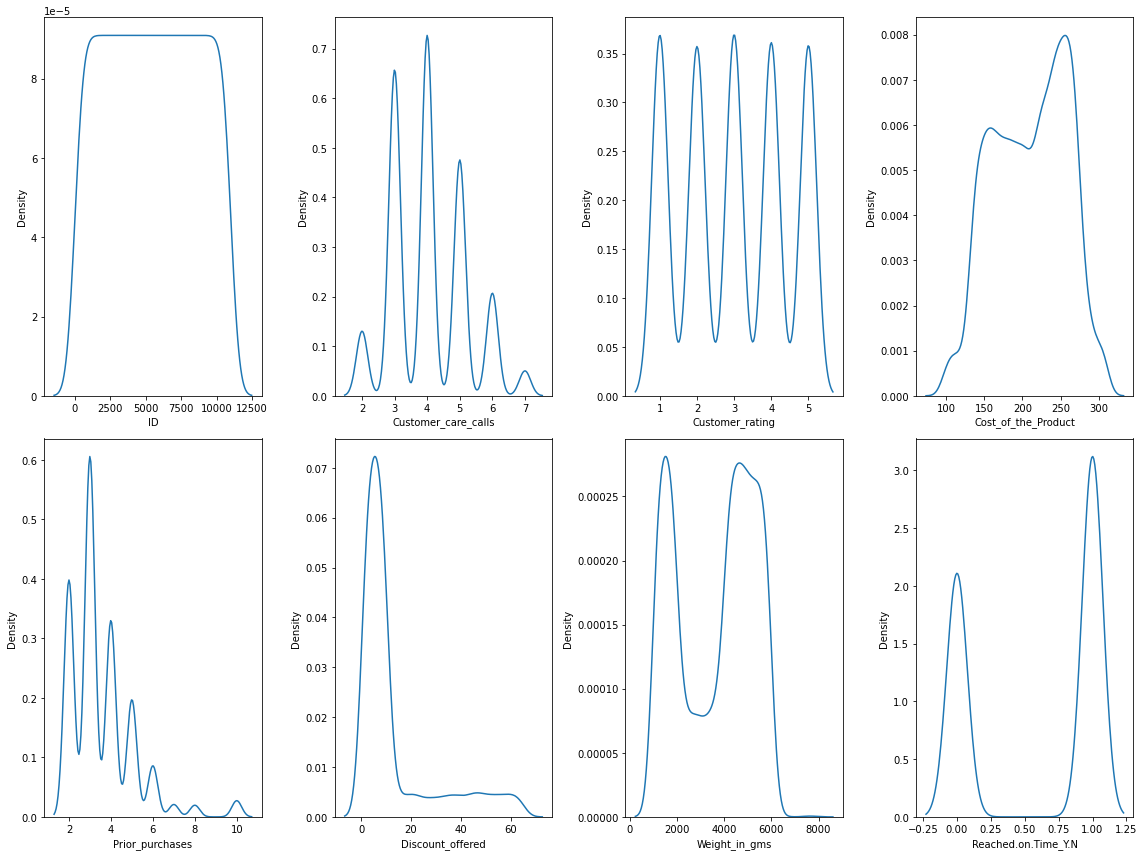

In [30]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(2, round(len(num)/2), i+1)
    sns.kdeplot(x = df[num[i]])
    plt.tight_layout()

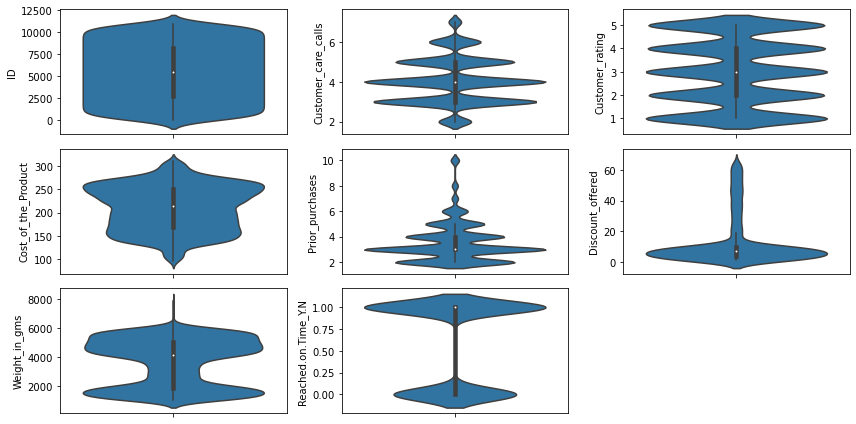

In [13]:
plt.figure(figsize = (12,6))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.violinplot(y = df[num[i]])
    plt.tight_layout()

In [14]:
cat

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [15]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [19]:
def group_df_uni(col):
    ndf = df.groupby(col).agg({'ID':'nunique'}).reset_index()
    ndf['percentage'] = (ndf['ID']/df['ID'].nunique()) * 100
    return ndf

def plot_bar_uni(col):
    df1 = group_df_uni(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'ID', data = df1, ax = ax[0], ci = None)
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', data = df1, ax = ax[1], ci = None)

In [22]:
group_df_uni('Prior_purchases')

,Prior_purchases,ID,percentage
0,2,2599,23.629421
1,3,3955,35.957814
2,4,2155,19.592690
3,5,1287,11.701064
4,6,561,5.100464
5,7,136,1.236476
6,8,128,1.163742
7,10,178,1.618329


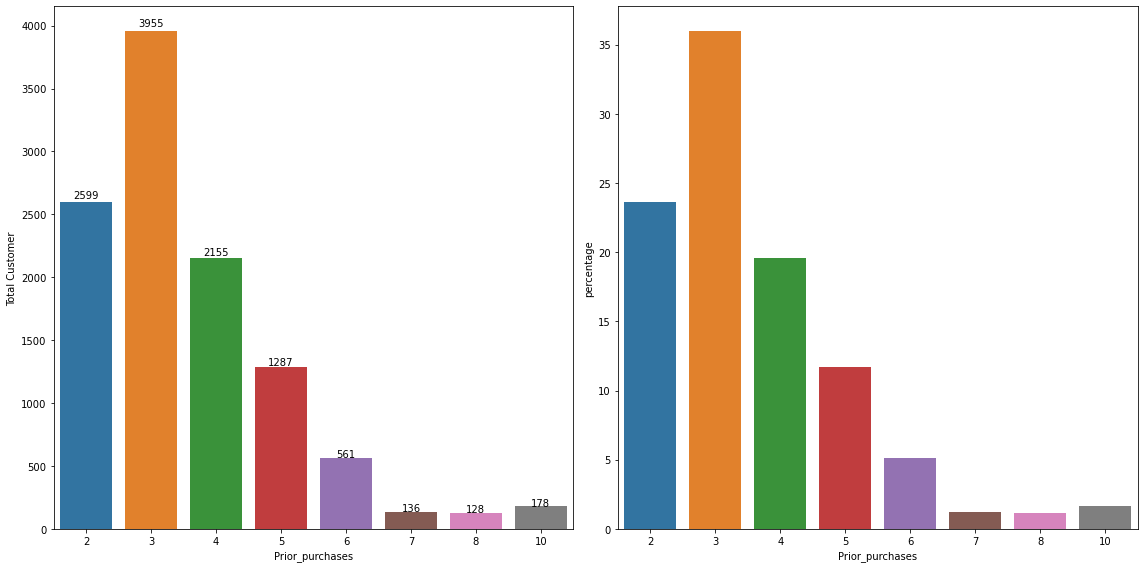

In [24]:
plot_bar_uni('Prior_purchases')
plt.tight_layout()

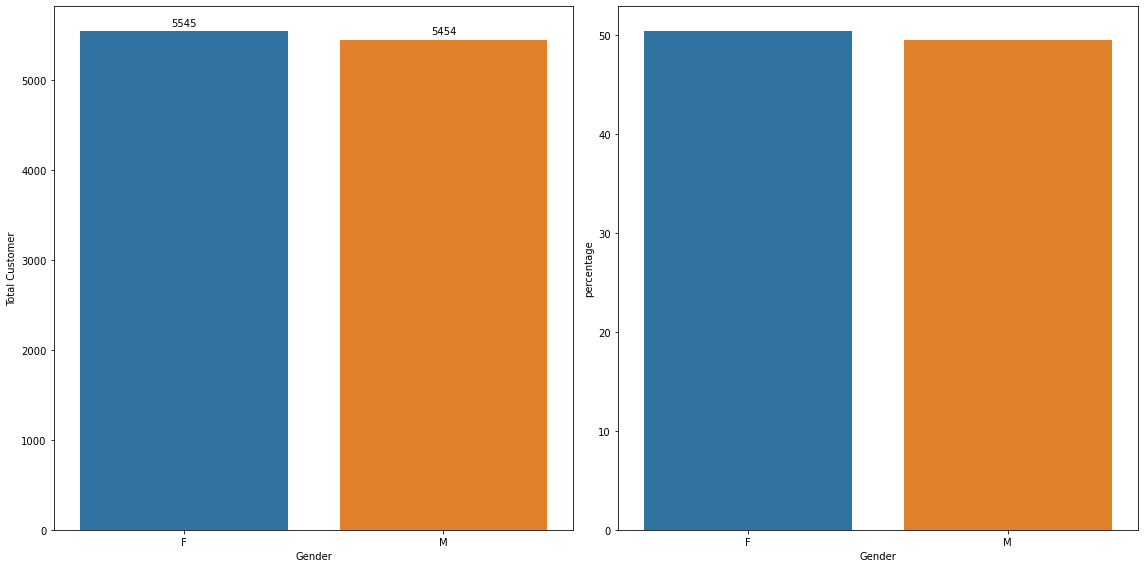

In [25]:
plot_bar_uni('Gender')
plt.tight_layout()

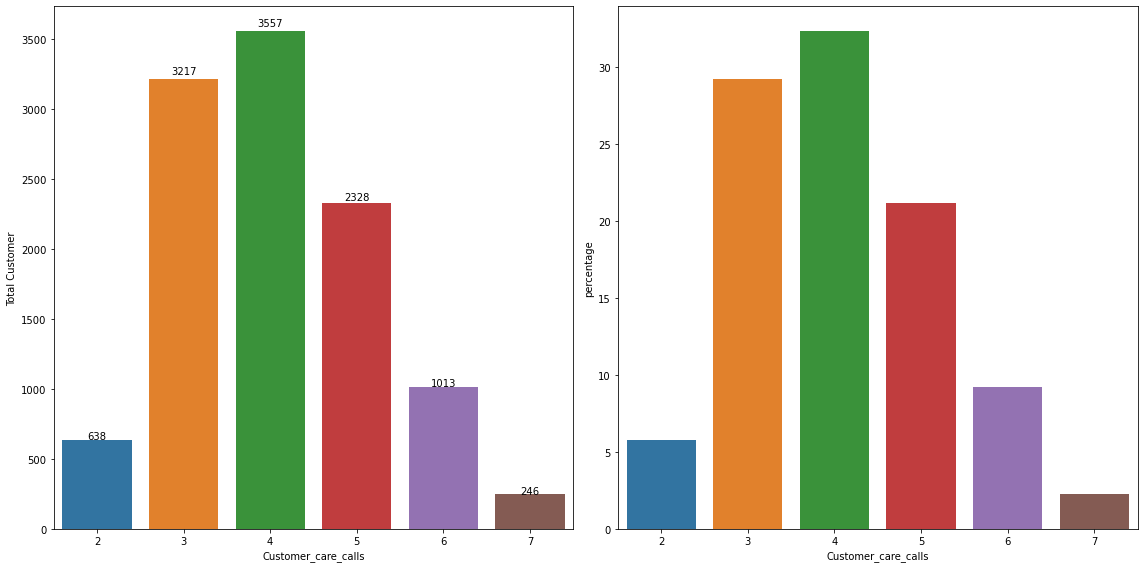

In [26]:
plot_bar_uni('Customer_care_calls')
plt.tight_layout()

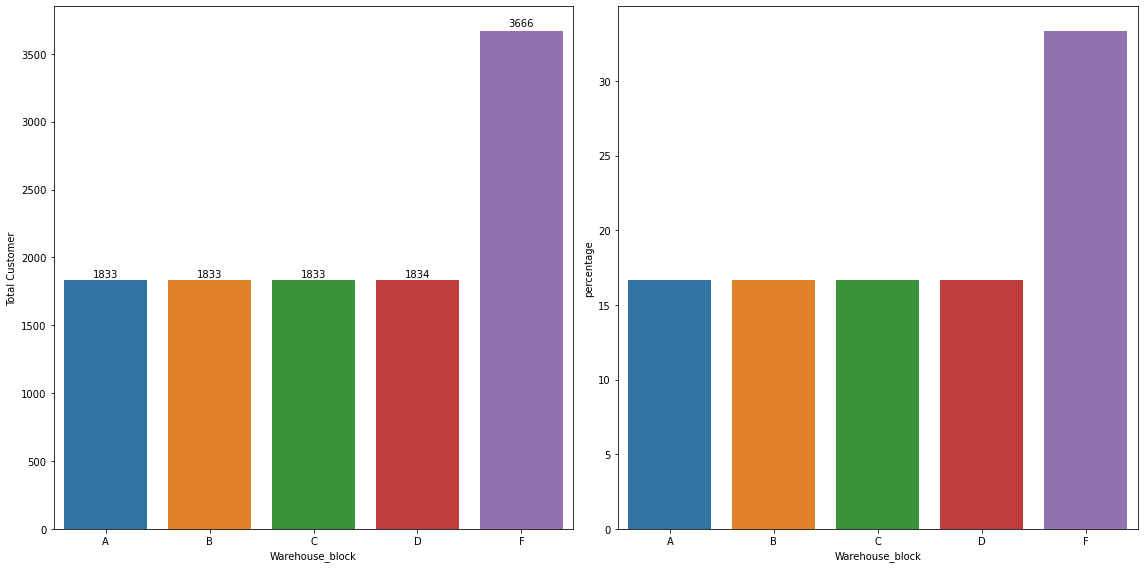

In [27]:

plot_bar_uni('Warehouse_block')
plt.tight_layout()

## Multivariate Analysis